<!--# STAT 207: Data Science Exploration-->

# <u> Unit 13 Notebook</u>: Multiple Linear Regression

## <u>Case Study</u> Weight Distribution Changes over Time for Males and Females 

### <u>Sample Analysis</u>
* **<u>Question 1</u>: Is there a linear association between height and weight in a random sample of healthy adults?**

* **<u>Question 2</u>: Is the linear relationship between height and weight different for males and females of different age groups in a random sample of healthy adults?**

In this analysis we will examine the height and weight of a random sample of 487 healthy males and females of three different age groups:
* under 30
* 30-39
* 40 and over

### <u>Population Analysis</u>
We would also like to explore whether these findings hold in a larger population of ALL healthy adults. So, IF we were to fit a multiple linear regression model, predicting the **weight** of a healthy adult (from the whole population) given **height**, **sex**, and **age group**, we would further like to answer the following questions.

* **<u>Question 3</u>: Is there sufficient evidence to suggest that the population slope for <u>height</u> is non-zero in this model?**
* **<u>Question 4</u>: Is there sufficient evidence to suggest that the population slope for <u>sex</u> is non-zero in this model?**
* **<u>Question 5</u>: Is there sufficient evidence to suggest that the population slope for <u>age_group</u> is non-zero in this model?**




<hr style="height:1px;border:none;color:#333;background-color:#333;" />






## <u>Make sure you install first</u>: statsmodel

To install statsmodels from the anaconda command line:

    conda install -c conda-forge statsmodels
    
### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## 1. Analyses for Association

#### See Unit 13 slides (section 1)

## 2. Association Analysis Summary
### <u>Explanatory</u>: Numerical and/or Categorical
### <u>Response</u>: Numerical


#### See Unit 13 slides (section 2)


## 3. Basic Descriptive Analytics - Two Numerical Variables

### 3.1. Visualizations

#### See Unit 13 slides (section 3)


#### Let's first read our bdims.csv dataset.

(There are no missing values represented in this dataset).






In [2]:
df_full = pd.read_csv('bdims.csv', sep=',')
df_full.head()

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,Male,under_30
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,Male,under_30
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,Male,under_30
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,Male,under_30
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30


In [3]:
df_full.shape

(487, 26)

In [4]:
df_full.columns

Index(['biacromial_diameter', 'pelvic_breadth', 'bitrochanteric_diameter',
       'chest_depth', 'chest_diameter', 'elbow_diameter', 'wrist_diameter',
       'knee_diameter', 'ankle_diameter', 'shoulder_girth', 'chest_girth',
       'waist_girth', 'navel_girth', 'hip_girth', 'thigh_girth', 'bicep_girth',
       'forearm_girth', 'knee_diameter.1', 'calf_girth', 'ankle_girth',
       'wrist_girth', 'age', 'weight', 'height', 'sex', 'age_group'],
      dtype='object')

#### We only plan to use a few variables from this dataframe, so let's create a smaller dataframe to enable faster/easier processing.

Specifically, we will only be examining the following attributes:
* the weights,
* the heights,
* the sex,
* the age group,
* the waist girth, and
* the elbow diameter.

In [5]:
df=df_full[['weight', 'height', 'sex', 'age_group', 'waist_girth', 'elbow_diameter']]

#### Let's first examine the pairwise relationships of each pair of numerical variables in the dataframe as well as the histogram of each numerical variable.

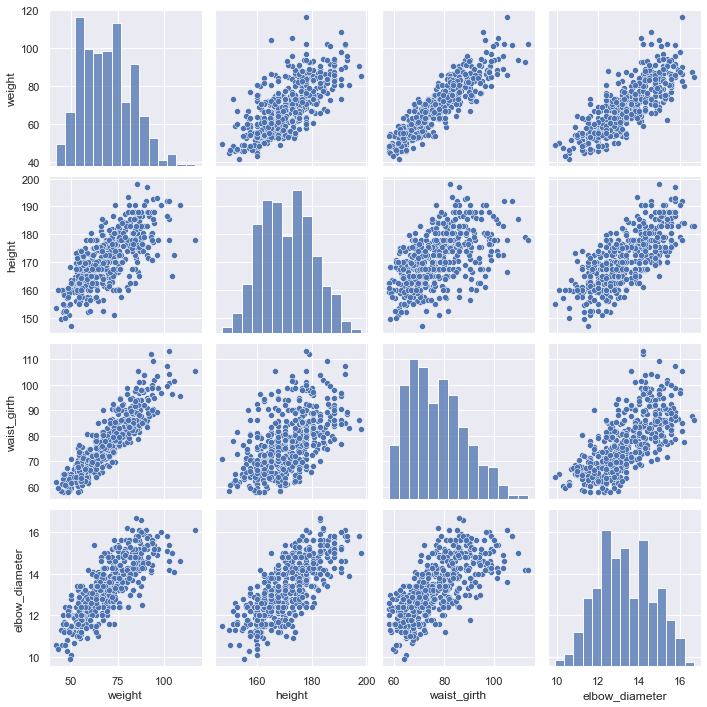

In [6]:
sns.pairplot(df)
plt.show()

We can see that all pairs of numerical variables have linear relationships with each other. Therefore, we can use the correlation coefficient R to evaluate the strength and direction of each of these pairs of numerical variables.

In [7]:
df.corr()

,weight,height,waist_girth,elbow_diameter
weight,1.000000,0.719449,0.905462,0.803470
height,0.719449,1.000000,0.558367,0.735508
waist_girth,0.905462,0.558367,1.000000,0.703589
elbow_diameter,0.803470,0.735508,0.703589,1.000000


Out of all pairs of numerical variables, it looks like **weight** and **waist girth** (correlation coefficient of 0.905) have the strongest association and **height** and **waist girth** have the weakest relationship (correlation coefficient of 0.558).

#### We can also examine a series of summary statistics about each of the numerical variables individually.

In [8]:
df.describe()

,weight,height,waist_girth,elbow_diameter
count,487.000000,487.000000,487.000000,487.000000
mean,68.947023,170.913963,76.896099,13.341273
std,13.455621,9.451632,11.151494,1.350339
min,42.000000,147.200000,57.900000,9.900000
25%,58.200000,163.350000,67.900000,12.400000
50%,67.900000,170.200000,75.700000,13.200000
75%,78.700000,177.800000,84.500000,14.300000
max,116.400000,198.100000,113.200000,16.700000


#### We can also examine each of the categorical variables individually.

In [9]:
df['sex'].value_counts()

Female    260
Male      227
Name: sex, dtype: int64

In [10]:
df['age_group'].value_counts()

under_30        277
30-39           118
40 and above     92
Name: age_group, dtype: int64

In [11]:
pd.crosstab(df['sex'], df['age_group'])

age_group,30-39,40 and above,under_30
sex,,,
Female,61,37,162
Male,57,55,115


It looks the most represented age group is those that are under 30.


These basic analyses about the whole dataset are useful to get a sense as to the nature of the data that we are working with. However, in this specific analysis, we suspect that the **weight** of healthy adults is influenced by **height**. Thus we consider **weight** to be the response variable and **height** to be an explanatory varaible.


In addition, we would like to see how/if this relationship changes based on sex and age_group. Thus we will consider **sex** and **age_group** to also be explanatory variables.

Because we have a specific set of questions in mind that we would like to answer about the sample, we should be thoughtful about which visualizations and summary statistics will best help us answer these questions.

### 3.1 Relationships between the response variable and each explanatory variable *individually*.

First, let's examine the relatioship between weight (the response varaible) and each of our explanatory variables *individually.*

#### 3.1.1. Describe the relationship between weight in height.

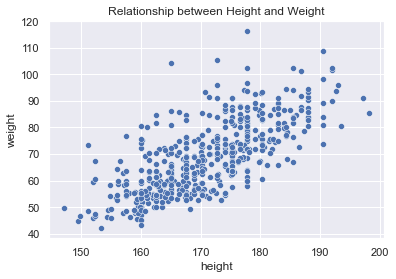

In [12]:
sns.scatterplot(x="height",y='weight', data=df)
plt.title('Relationship between Height and Weight')
plt.show()

By looking at the scatterplot above, the association between height and weight in the sample is positive, linear, moderately strong, and there does not seem to be any obvious outliers.

Because the relationship is linear, we can use the correlation coefficient to quantify the strength and direction of the relationship.

In [13]:
df[['height','weight']].corr()

,height,weight
height,1.000000,0.719449
weight,0.719449,1.000000


Thus, a relatively high correlation coefficient R=0.719, further validates that there is a moderately strong linear relationship between height and weight in the sample.

#### 3.1.2 Describe the relationship between sex and weight.

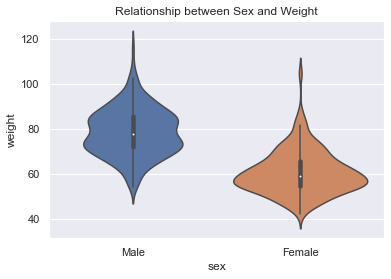

In [14]:
sns.violinplot(x="sex", y='weight', data=df)
plt.title('Relationship between Sex and Weight')
plt.show()

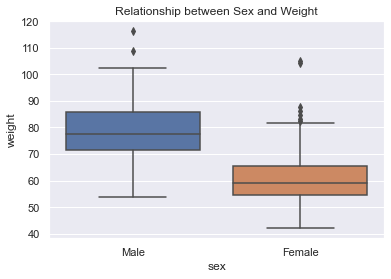

In [15]:
sns.boxplot(x="sex", y='weight', data=df)
plt.title('Relationship between Sex and Weight')
plt.show()

Remember, there are always four things that we should be ready to compare when discussing the association between a categorical variable (sex) and a numerical variable (weight).

1. <u>Compare Measures of Center</u>: We can see that the median male weight is higher than the median female weight. 
2. <u>Compare Measures of Spread</u>: The IQR and range of male and females weight is about the same.
3. <u>Compare Distribution Shapes</u>: The male weight distribution looks slightly bimodal, and is slightly right skewed. The female weight distribution is unimodal, and more skewed to the right.
4. <u>Compare Outliers</u>: Both distributions have high outliers. The female distribution has a few more outliers than the male distribution.


#### 3.1.3 Describe the relationship between age_group and weight.

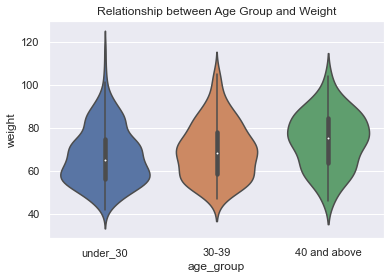

In [16]:
sns.violinplot(x="age_group", y='weight', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

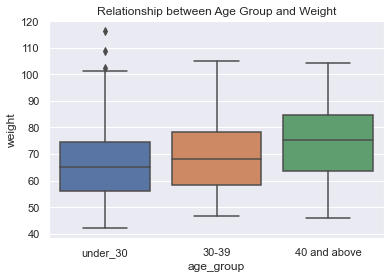

In [17]:
sns.boxplot(x="age_group", y='weight', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

1. <u>Compare Measures of Center</u>: The median weight increase as the age group increases.
2. <u>Compare Measures of Spread</u>: The IQR and range of of the age groups is about the same.
3. <u>Compare Distribution Shapes</u>: Weight distributions look mostly unimodal. The under 30 and 30-39 age groups are slightly right skewed and the 40 and over age group is slightly left skewed.
4. <u>Compare Outliers</u>: Only the under 30 age group has outliers. These outliers are high.

### 3.2 Relationships between the response variable and two explanatory variables.


#### 3.2.1. Describe the relationship betweeen height and weight for males and females.

We can use the **sns.scatterplot()** function to plot the relationship between two numerical variables (using the **x and y parameters**), and then we can color-code the points based on another variable (using the **hue parameter**).


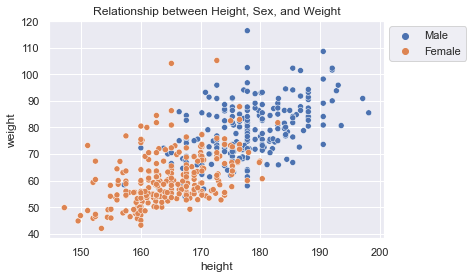

In [18]:
sns.scatterplot(x="height",y='weight', hue='sex', data=df)
plt.title('Relationship between Height, Sex, and Weight')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

If we want to draw a best fit line, for each of the levels represented by the **hue parameter** then we can use the **sns.lmplot()** function.

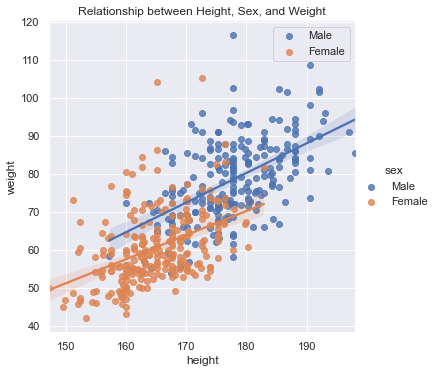

In [19]:
sns.lmplot(x="height",y='weight', hue='sex', data=df)
plt.title('Relationship between Height, Sex, and Weight')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

* <u>Intercept Comparison</u>: It looks like the intercept of the male best fit line is higher than the intercept for the female best fit line. 
* <u>Slope Comparison</u>: It looks like the slope of the male best fit line is slightly higher than the slope for the female best fit line. 

If we would like to directly calculate a summary statistic on a subset of observations (where each subset corresponds to each level of a given categorical variable), then we can use the **.groupby()** function.

For instance, the code below calculates the correlation between weight and height for each level of the **sex** variable.

In [20]:
df[['sex', 'height', 'weight']].groupby(['sex']).corr()

height    weight
sex                              
Female height  1.000000  0.431059
       weight  0.431059  1.000000
Male   height  1.000000  0.536599
       weight  0.536599  1.000000

* <u>Compare Correlations</u>: Thus, the strength of the linear relationship of height and weight for males (0.537) is higher than the strength of the relationship of height and weight for females (0.431).

#### 3.2.2. Describe the relationship betweeen height and weight for the different age groups.

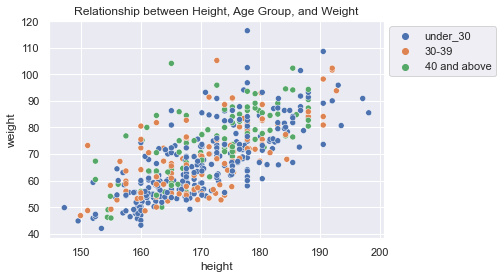

In [21]:
sns.scatterplot(x="height",y='weight', hue='age_group', data=df)
plt.title('Relationship between Height, Age Group, and Weight')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

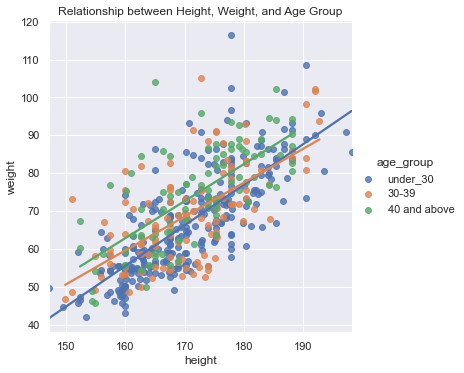

In [22]:
sns.lmplot(x="height",y='weight', hue='age_group', data=df, ci=False)
plt.title('Relationship between Height, Weight, and Age Group')
plt.show()

* <u>Slope Comparison</u>: It looks like the slopes of the under 30 age group and 40 and above age groups are almost parallel, whereas the 30-39 age group slope is slightly smaller.

In [23]:
df.groupby(['age_group']).corr()

weight    height  waist_girth  elbow_diameter
age_group                                                                   
30-39        weight          1.000000  0.649175     0.916938        0.733133
             height          0.649175  1.000000     0.497285        0.719191
             waist_girth     0.916938  0.497285     1.000000        0.638171
             elbow_diameter  0.733133  0.719191     0.638171        1.000000
40 and above weight          1.000000  0.699453     0.904493        0.776830
             height          0.699453  1.000000     0.581820        0.757793
             waist_girth     0.904493  0.581820     1.000000        0.671320
             elbow_diameter  0.776830  0.757793     0.671320        1.000000
under_30     weight          1.000000  0.768051     0.921540        0.825232
             height          0.768051  1.000000     0.632940        0.750642
             waist_girth     0.921540  0.632940     1.000000        0.739523
             elbow_diameter  0.825232  0.750642     0.739523        1.000000

* <u>Compare Correlations</u>: The strength of the linear relationship between height and weight is highest for those under 30 (0.768) and is lowest for those that are 30-39.

#### 3.2.3. Describe the relationship betweeen weight and sex the different age groups.


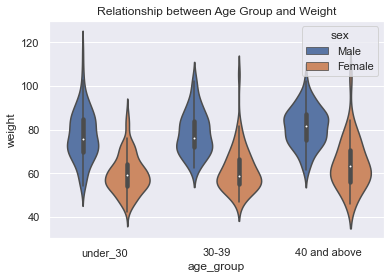

In [24]:
sns.violinplot(x="age_group", y='weight', hue='sex', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

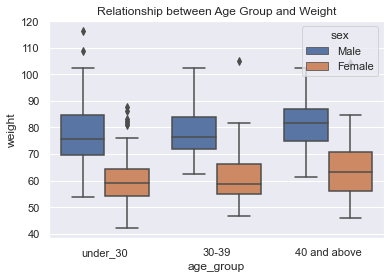

In [25]:
sns.boxplot(x="age_group", y='weight', hue='sex', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

<u>Comparing Measure of Center Changes for Different Sexes</u>:
* The difference in male and female median weight is about the same for all three age groups.

<u>Comparing Measure of Spread Changes for Different Sexes</u>:
* Under 30 males have a higher IQR than under 30 females.
* 40 and over males have a smaller IQR than 40 and over females.

<u>Comparing Shape Changes for Different Sexes</u>:
* The skew for under 30 males is more right skewed than the skew for under 30 females. All distributions are unimodal.
* The skew for 30-39 and 40 and over males is less right skewed than skew for 30-39 and 40 and over females. All distributions are unimodal.

<u>Comparing Outliers Changes for Different Sexes</u>:
* For all three age groups, the females have more outliers.

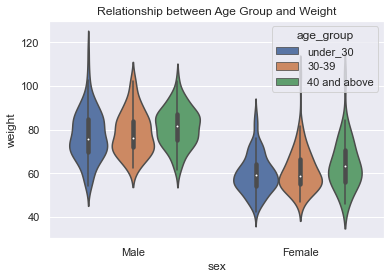

In [26]:
sns.violinplot(x="sex", y='weight', hue='age_group', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

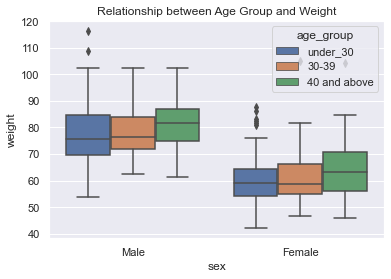

In [27]:
sns.boxplot(x="sex", y='weight', hue='age_group', data=df)
plt.title('Relationship between Age Group and Weight')
plt.show()

<u>Comparing Measure of Center Changes as Age Increases</u>:
* The weight median for males increase as the age group increases.
* The weight median for females increases as the age group increases.

<u>Comparing Measure of Spread Changes as Age Increases</u>:
* The weight spread for males decreases as the age group increases.
* The weight spread for females increases as the age group increases.

<u>Comparing Shape Changes as Age Increases</u>:
* The skew for males becomes less right skewed as the age increases. All distributions are unimodal.
* The skew for females becomes more right skewed as the age increases. All distributions are unimodal.

<u>Comparing Outliers Changes as Age Increases</u>:
* Only males under 30 have weight outliers.
* Only females under 30 have weight outliers.

### 3.3 Relationships between the response variable and three explanatory variables.

We can also use the **sns.scatterplot()** function to plot the relationship between two numerical variables (using the **x and y parameters**), and then we can:
* color-code the points based on another variable (using the **hue parameter**), and
* code the marker size by another variable (using the **size parameter**).


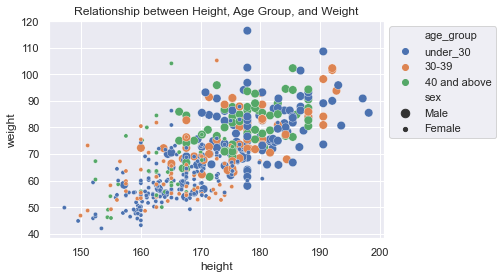

In [28]:
sns.scatterplot(x="height",y='weight', hue='age_group', size='sex', data=df)
plt.title('Relationship between Height, Age Group, and Weight')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

We can also use the **sns.scatterplot()** function to plot the relationship between two numerical variables (using the **x and y parameters**), and then we can:
* color-code the points based on another variable (using the **hue parameter**), and
* code the marker style by another variable (using the **style parameter**).

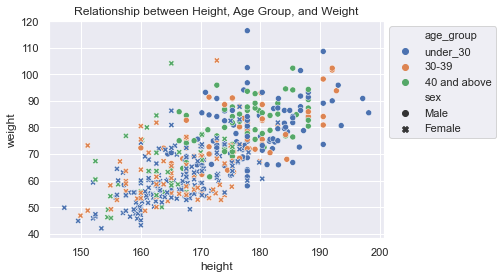

In [29]:
sns.scatterplot(x="height",y='weight', hue='age_group', style='sex', data=df)
plt.title('Relationship between Height, Age Group, and Weight')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

If we want to draw a best fit line (breaking the data down by two or more categorical variables), we can use the **sns.lmplot()** and specify variables names for the:
* col parameter and,
* row parameter.

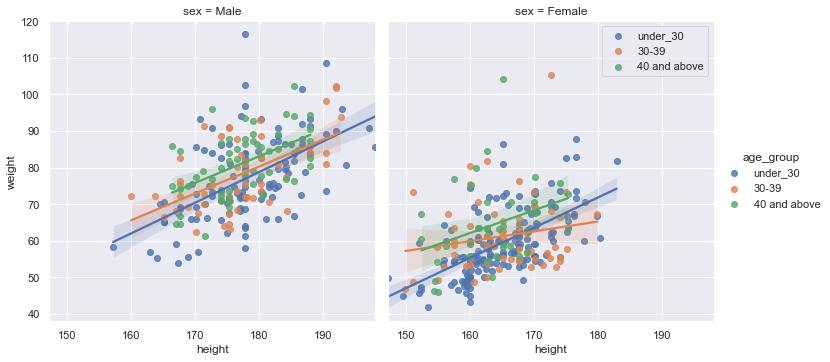

In [30]:
sns.lmplot(x="height",y='weight', hue='age_group', col='sex', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

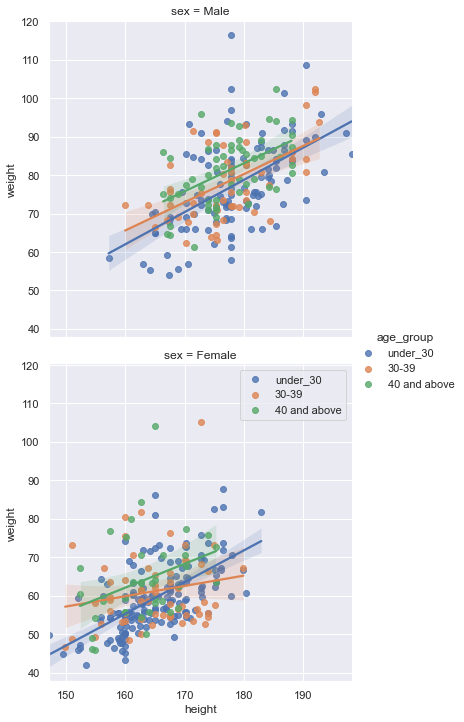

In [31]:
sns.lmplot(x="height",y='weight', hue='age_group', row='sex', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

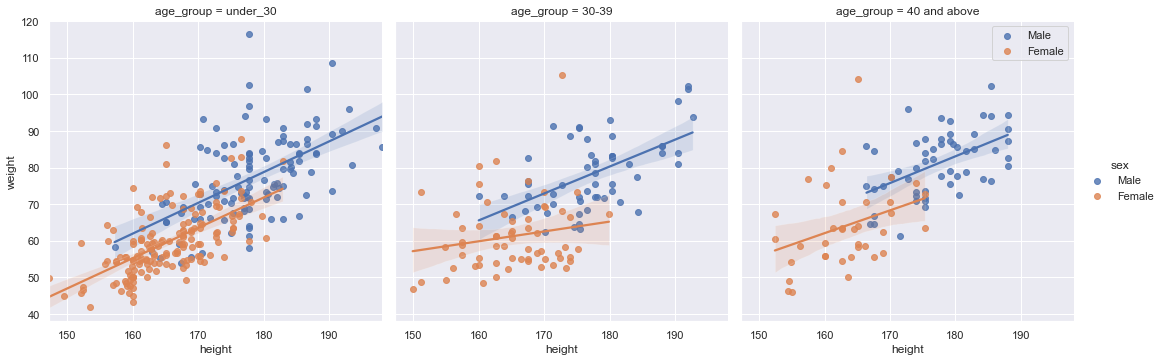

In [32]:
sns.lmplot(x="height",y='weight', hue='sex', col='age_group', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [33]:
df.groupby(['sex','age_group']).corr()

weight    height  waist_girth  \
sex    age_group                                                      
Female 30-39        weight          1.000000  0.182259     0.884331   
                    height          0.182259  1.000000     0.005927   
                    waist_girth     0.884331  0.005927     1.000000   
                    elbow_diameter  0.408199  0.350111     0.277085   
       40 and above weight          1.000000  0.326263     0.860214   
                    height          0.326263  1.000000     0.000972   
                    waist_girth     0.860214  0.000972     1.000000   
                    elbow_diameter  0.695378  0.389143     0.487145   
       under_30     weight          1.000000  0.613888     0.848198   
                    height          0.613888  1.000000     0.322365   
                    waist_girth     0.848198  0.322365     1.000000   
                    elbow_diameter  0.680492  0.499629     0.468677   
Male   30-39        weight          1.000000  0.569800     0.814738   
                    height          0.569800  1.000000     0.208744   
                    waist_girth     0.814738  0.208744     1.000000   
                    elbow_diameter  0.509941  0.507973     0.197176   
       40 and above weight          1.000000  0.521314     0.798862   
                    height          0.521314  1.000000     0.209410   
                    waist_girth     0.798862  0.209410     1.000000   
                    elbow_diameter  0.524962  0.536937     0.239805   
       under_30     weight          1.000000  0.553887     0.865876   
                    height          0.553887  1.000000     0.296707   
                    waist_girth     0.865876  0.296707     1.000000   
                    elbow_diameter  0.648278  0.468378     0.421885   

                                    elbow_diameter  
sex    age_group                                    
Female 30-39        weight                0.408199  
                    height                0.350111  
                    waist_girth           0.277085  
                    elbow_diameter        1.000000  
       40 and above weight                0.695378  
                    height                0.389143  
                    waist_girth           0.487145  
                    elbow_diameter        1.000000  
       under_30     weight                0.680492  
                    height                0.499629  
                    waist_girth           0.468677  
                    elbow_diameter        1.000000  
Male   30-39        weight                0.509941  
                    height                0.507973  
                    waist_girth           0.197176  
                    elbow_diameter        1.000000  
       40 and above weight                0.524962  
                    height                0.536937  
                    waist_girth           0.239805  
                    elbow_diameter        1.000000  
       under_30     weight                0.648278  
                    height                0.468378  
                    waist_girth           0.421885  
                    elbow_diameter        1.000000

* <u> Comparing Correlations</u>: 
    - 30-39 females have the weakest relationship of height and weight (R=0.182)
    - 30-39 males have the strongest relationship of height and weight (R=0.570)
* <u> Comparing Slopes</u>: 
    - 30-39 females have the smallest best fit line slope modeling the relationship of height and weight
    - the slopes of all other sex and age groups are more similar.
    
## 4. Multiple Linear Regression - Sample Data

#### See unit 13 slides (section 4)

## 5. Categorical Explanatory Variables

#### See unit 13 slides (section 5)

## 6. Interpreting Intercepts and Slopes of a Regression Equations

#### See unit 13 slides (section 6)

Let's create our multiple linear regression equation with weight as a response variable and height, sex, and age_group as explanatory variables.

We can use the same function and format as simple linear regression equations.
* The response variable goes on the left part of the "equation" in the **smf.ols()** function.
* The explanatory variables go on the right part of the "equation" in the **smf.ols()** function
    - Each explanatory variable is separated by a **+**.
    - The **smf.ols()** function automatically creates indicator variables when it detects a categorical explanatory variable.


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

This step fits the model and creates an object containing the results.

In [35]:
results = smf.ols('weight ~ height+sex+age_group', data=df).fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           7.71e-93
Time:                        11:05:16   Log-Likelihood:                -1737.1
No. Observations:                 487   AIC:                             3484.
Df Residuals:                     482   BIC:                             3505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -59.0102      9.409     -6.272      0.000     -77.498     -40.523
sex[T.Male]                   7.9128      1.086      7.286      0.000       5.779      10.047
age_group[T.40 and above]     3.4030      1.202      2.830      0.005       1.041       5.765
age_group[T.under_30]        -1.7432      0.949     -1.838      0.067      -3.607       0.121
height                        0.7291      0.057     12.821      0.000       0.617       0.841
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.551
Skew:                           1.032   Prob(JB):                     2.29e-40
Kurtosis:                       5.176   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Formulating the multiple linear regression line.

$\hat{y}=-59.0102 + 7.9128sex[T.Male] + 3.4030age\_group[T.40 and above] -1.7432age\_group[T.under\_30] +0.7291height$

### Interpreting the Intercept

* **We would <u>expect the average</u> weight of a female in her 30's that is 0 cm tall to be -59.0102 kg.**
 - This is a nonsensical answer though because:
     - You can't have a person that is 0 cm tall and
     - You can't have a person that has a negative weight.


### Interpreting the Slopes

* <u>All else held equal</u>, if we were to increase the height of a healthy adult by 1 cm, then we would <u>expect</u> the weight to increase, <u>on average</u>, by 0.7291 kg.

* <u>All else held equal</u>, we would <u>expect the the average</u> healthy adult male weight to be 7.9128 kg higher than healthy adult females.

* <u>All else held equal</u>, we would <u>expect the the average</u> weight of healthy adults under 30 to be 1.7432 kg lower than healthy adults in their 30's.

* <u>All else held equal</u>, we would <u>expect the the average</u> weight of healthy adults at least 40 to be 3.4030 kg higher than healthy adults in their 30's.

## 7. Inference for Multiple Linear Regression Intercept and Slopes

#### see Unit 13 slides section 7

### 7.1 Conditions for Inference on Multiple Linear Regression Intercept and Slopes

#### see Unit 13 slides section 7

**Ex:** Suppose now we also wanted to add ‘elbow diameter’ to our list of explanatory variables.

#### 7.1.1. Fit a multiple linear regression model predicting weight with:
a.	Height

b.	Elbow diameter

c.	Sex

d.	Age group.


In [37]:
results = smf.ols('weight ~ height+ elbow_diameter+sex+age_group', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     212.0
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          4.04e-119
Time:                        11:05:16   Log-Likelihood:                -1672.9
No. Observations:                 487   AIC:                             3358.
Df Residuals:                     481   BIC:                             3383.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -75.1198      8.363     -8.982      0.000     -91.553     -58.686
sex[T.Male]                   0.7195      1.125      0.640      0.523      -1.490       2.929
age_group[T.40 and above]     1.2766      1.070      1.194      0.233      -0.825       3.378
age_group[T.under_30]        -1.4391      0.833     -1.728      0.085      -3.075       0.197
height                        0.4139      0.056      7.345      0.000       0.303       0.525
elbow_diameter                5.5146      0.458     12.043      0.000       4.615       6.414
==============================================================================
Omnibus:                       61.496   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.358
Skew:                           0.833   Prob(JB):                     5.34e-21
Kurtosis:                       4.352   Cond. No.                     4.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 7.1.2. What is the $R^2$ of this model?

$R^2=0.688$

In [38]:
results.rsquared

0.6878417369562507

#### 7.1.3 Check the multiple linear regression conditions for inference for this model.

**<u>Condition 1</u>: Linearity Condition**

Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

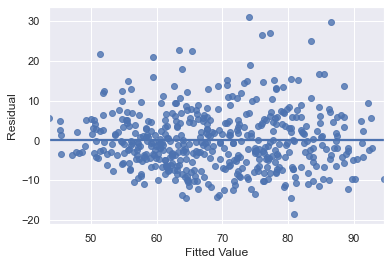

In [39]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below slightly change as we move from left to right, we can say that this condition is slightly not met.

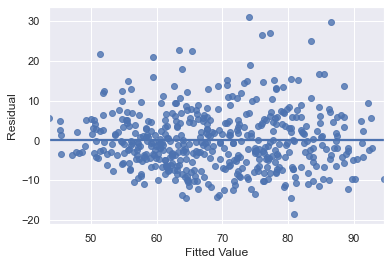

In [40]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

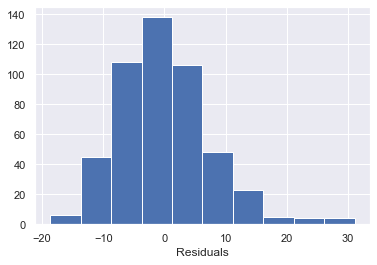

In [41]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=487<10% of all healthy adults

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

Let's take a look at the relationships between each pair of numerical explanatory variables. (We only have two in this example, but the **sns.pairplot()** can be useful when you have lots of numerical explanatory variables).

We see that there is a pretty strong linear relationship (R=0.736) between the explanatory variables height and elbow_diameter. **Thus the multicollinearity condition is violated**.

**Leaving in both of these explanatory variables may lead to biased estimates for the slopes.**

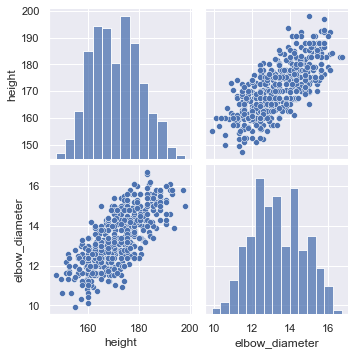

In [42]:
sns.pairplot(df[['height','elbow_diameter']])
plt.show()

In [43]:
df[['height','elbow_diameter']].corr()

,height,elbow_diameter
height,1.000000,0.735508
elbow_diameter,0.735508,1.000000


#### 7.1.4 If we were to delete one of these numerical explanatory variables (because of the multicollinearity condition being violated), which one would you choose.

Let's try deleting both variables (one at a time) and see which resulting model has a higher $R^2$ (ie. more explanatory power).

In [44]:
results = smf.ols('weight ~ height+sex+age_group', data=df).fit()
print('R^2 for the model without elbow_diameter:',results.rsquared)

R^2 for the model without elbow_diameter: 0.5937143871724584


In [45]:
results = smf.ols('weight ~ elbow_diameter+sex+age_group', data=df).fit()
print('R^2 for the model without height:',results.rsquared)

R^2 for the model without height: 0.6528321666723595


If you were particularly interested in exploring the relationship between weight, <u>height</u>, sex, and age, then you would want to delete the <u>height</u> variable. This is because the $R^2$ of the model without height is higher, and thus can explain more of the variability of weight.

However, because we knew ahead of time that we were interested in exploring the relationship between weight, <u>height</u>, sex, and age we will delete elbow_diameter and keep height.

#### 7.1.5	Fit a multiple linear regression model predicting weight with the following explanatory variables and check the conditions.
a.	Height

b.	<s>Elbow diameter</s>

c.	Sex

d.	Age group.


In [46]:
results = smf.ols('weight ~ height+sex+age_group', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           7.71e-93
Time:                        11:05:17   Log-Likelihood:                -1737.1
No. Observations:                 487   AIC:                             3484.
Df Residuals:                     482   BIC:                             3505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -59.0102      9.409     -6.272      0.000     -77.498     -40.523
sex[T.Male]                   7.9128      1.086      7.286      0.000       5.779      10.047
age_group[T.40 and above]     3.4030      1.202      2.830      0.005       1.041       5.765
age_group[T.under_30]        -1.7432      0.949     -1.838      0.067      -3.607       0.121
height                        0.7291      0.057     12.821      0.000       0.617       0.841
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.551
Skew:                           1.032   Prob(JB):                     2.29e-40
Kurtosis:                       5.176   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 7.1.3 Check the multiple linear regression conditions for inference for this model.

**<u>Condition 1</u>: Linearity Condition**

Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

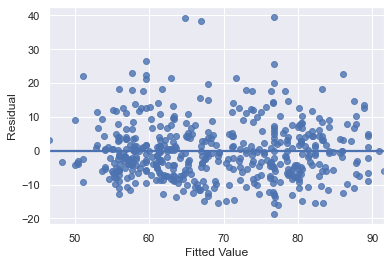

In [47]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below doesn't really change as we move from left to right, we can say that this condition is met.

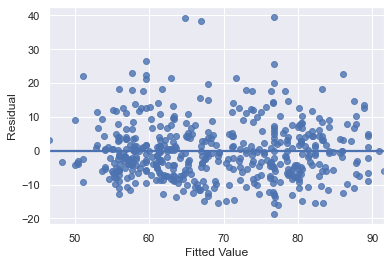

In [48]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

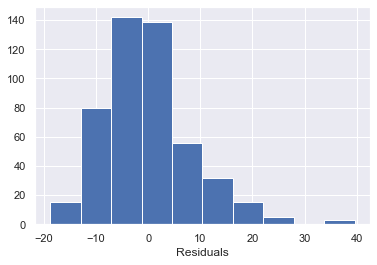

In [49]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=487<10% of all healthy adults

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

This new model only has one numerical explanatory variable, height. So height will not be collinear with another numerical variable. Thus this condition is met.

## 7.2 Inference for a <u>Single</u> Multiple Linear Regression Slope

#### see unit 13 slides section 7.2

### 7.2.1 Confidence Interval for a Single Multiple Linear Regression Slope

Create a 90% confidence interval for the height slope in the model above and interpret it.

In [50]:
results = smf.ols('weight ~ height+sex+age_group', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           7.71e-93
Time:                        11:05:18   Log-Likelihood:                -1737.1
No. Observations:                 487   AIC:                             3484.
Df Residuals:                     482   BIC:                             3505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -59.0102      9.409     -6.272      0.000     -77.498     -40.523
sex[T.Male]                   7.9128      1.086      7.286      0.000       5.779      10.047
age_group[T.40 and above]     3.4030      1.202      2.830      0.005       1.041       5.765
age_group[T.under_30]        -1.7432      0.949     -1.838      0.067      -3.607       0.121
height                        0.7291      0.057     12.821      0.000       0.617       0.841
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.551
Skew:                           1.032   Prob(JB):                     2.29e-40
Kurtosis:                       5.176   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1. First, because our multiple linear regression inference conditions hold (checked above), our confidence interval will not be making invalid interpretations and conclusions.**

**2. Creating the confidence interval.**

In [51]:
point_estimate=0.7291
print('Point Estimate = Sample Slope = ', point_estimate)

Point Estimate = Sample Slope =  0.7291


In [52]:
standard_error=0.057
print('Standard Error', standard_error)

Standard Error 0.057


The critical value for this 90% confidence interval is the postive t-score $t^*$ (from the t-distribution with $df=n-p-1=487-4-1=482$) that encapsulates an area of $0.90$ between $-t^*$ and $t^*$.

(Remember, p=4=the number of <u>slopes</u> in the model.)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [53]:
from scipy.stats import t

critical_value=t.ppf(0.95, df=482)
print('Critical Value:', critical_value)

Critical Value: 1.6480210955444843


In [54]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval for the Height Population Slope in the Current Model:', lower_bound,upper_bound)

90% Confidence Interval for the Height Population Slope in the Current Model: 0.6351627975539643 0.8230372024460356


**3. Interpret the confidence interval**.

We are 90% confident that the height slope in the multiple linear regression population model (that predicts the weight of all healthy adults with height, age group, and sex) is between 0.635 and 0.823.

### 7.2.2. Conducting a hypothesis test for a single population slope, testing the claim $H_a: \beta_i\neq 0$.

We are interested in testing the claim that the height slope in the multiple linear regression population model (that predicts the weight of all healthy adults with height, age group, and sex) is non-zero.

**1. Set up your hypotheses.**

$H_0: \beta_4=0$

$H_A: \beta_4\neq0$

($\beta_4$ is the population slope that corresponds to height)

**2. Check your multiple linear regression inference conditions**

We already checked them for this model above, and found that they all hold. Thus the conclusions that we make with our p-value will not be invalid.

**3. Find the p-value for this test (in your summary output table).**

The summary output table tell us that this p-value<0.0001

**4. Calculate the p-value for this test (using the point estimate, the standard error, and the t-distribution).**

In [55]:
point_estimate=0.7291
print('Point Estimate = Sample Slope = ', point_estimate)

standard_error=0.057
print('Standard Error', standard_error)

null_value=0
print('Null Value:', null_value)

test_stat=(point_estimate-null_value)/standard_error
print('Test Statistic:', test_stat)

pvalue=2*(1-t.cdf(np.abs(test_stat), df=482))
print('p-value', pvalue)

Point Estimate = Sample Slope =  0.7291
Standard Error 0.057
Null Value: 0
Test Statistic: 12.791228070175437
p-value 0.0


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

**5. Make a conclusion with this p-value and a signficance level $\alpha=0.10$.**

Because $p-value<0.0001<\alpha=0.10$, we reject the null hypothesis. Thus we have sufficient evidence to suggest that the height slope $\beta_4$ in the multiple linear regression population model (that predicts the weight of all healthy adults with height, age group, and sex) is non-zero.

**6. Make a conclusion using the 90% confidence interval that you calculated above.**

Because the null value (0) is not in the 90% confidence interval (0.635, 0.823) we reject the null hypothesis. Thus we have sufficient evidence to suggest that the height slope $\beta_4$ in the multiple linear regression population model (that predicts the weight of all healthy adults with height, age group, and sex) is non-zero.

## 7.3. Inference for ALL Multiple Linear Regression Slopes

#### See unit 13 slides (Section 7.3)

### 7.3.1. F distribution

#### See unit 13 slides (section 7.3.1)



**Ex:** Calculate the probability that an F-score is less than or equal to 4, (using df1=3 and df2=9).

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

$P(F_{3,9}\leq 4) = 0.954$

In [56]:
from scipy.stats import f
f.cdf(4, dfn=3,dfd=9)

0.954016001798486

### 7.3.2. Conducting the Test $H_0: \beta_1-\beta_2=...=\beta_p=0$

#### See unit 13 slides (section 7.3.2)

**Ex:** When using sex, height, and age_group to predict weight in a linear regression equation, is there significant evidence to suggest that at least one of the slopes in the population linear regression model is non-zero?

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           7.71e-93
Time:                        11:05:18   Log-Likelihood:                -1737.1
No. Observations:                 487   AIC:                             3484.
Df Residuals:                     482   BIC:                             3505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -59.0102      9.409     -6.272      0.000     -77.498     -40.523
sex[T.Male]                   7.9128      1.086      7.286      0.000       5.779      10.047
age_group[T.40 and above]     3.4030      1.202      2.830      0.005       1.041       5.765
age_group[T.under_30]        -1.7432      0.949     -1.838      0.067      -3.607       0.121
height                        0.7291      0.057     12.821      0.000       0.617       0.841
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.551
Skew:                           1.032   Prob(JB):                     2.29e-40
Kurtosis:                       5.176   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1. First set up hypotheses for this test.**

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=0$

$H_A:$ at least one $\beta_i\neq 0$ (for $i=1,2,3,4$)

**2. Next, check conditions for this test.**

We have already checked the multiple linear regression conditions for inference and they all hold. Thus the inference that we make with this test will be valid.

**3. Use the summary output table to find the test statistic for this test**.

The output table tells us that $test stat=176.1$.

**4. Use this test statistic and the F-distribution to calculate the p-value for this test**

The two sets of degrees of freedom for this test are:
* $df1=p=4$ (ie. p=number of slopes)
* $df2=n-p-1=487-4-1=482$

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


$p-value=P(F_{4,482}\geq teststat) =P(F_{4,482}\geq 176.1)=1.11\times 10^{-16}$

In [58]:
pvalue=1-f.cdf(176.1, dfn=4,dfd=482)
print('p-value: ',pvalue)

p-value:  1.1102230246251565e-16


**5. Verify this p-value using the summary output table.**

The summary output tables says that $p-value=7.71\times 10^{-93}$. Because the p-value is very small, these p-value may be off due to some precision errors.

**6. Make a conclusion with this p-value, using $\alpha=0.05$**

Because the $p-value=7.71\times 10^{-93}\alpha=0.05$, we reject the null hypothesis. Thus there is suffificient evidence to suggest that at least one of the four population slopes in the model predicting weight with height, sex, and age group is non-zero.

### 7.3.3 Why would we want to conduct this test $H_0: \beta_1-\beta_2=...=\beta_p=0$?

#### see unit 13 slides (Section 7.3.3)

## 7.4 Inference for a Subset of Multiple Linear Regression Slopes

#### see unit 13 slides (Section 7.4)


**Ex:** Is there sufficient evidence to suggest that at least one of of the slopes that correspond to the age_group variable in the population model (predicting weight with height, age_group, and sex) are non-zero?

**1. First, give the full model and the reduced model. Fit them both in Python as well.**

<u>Full Model</u>

$\hat{y}=\hat{\beta}_0 + \hat{\beta}_1x_1 +\hat{\beta}_2x_2+\hat{\beta}_3x_3+\hat{\beta}_4x_4$

<u>Reduced Model</u>

$\hat{y}=\hat{\beta}_0 + \hat{\beta}_1x_1 +\hat{\beta}_4x_4$, 

where 
* $\hat{\beta}_1$ corresponds to the sex[T.Male] slope
* $\hat{\beta}_2$ corresponds to the age_group[T.40 and above] slope
* $\hat{\beta}_3$ corresponds to the age_group[T.under_30] slope
* $\hat{\beta}_4$ corresponds to the height slope


In [59]:
mod_full = smf.ols('weight~height+sex+age_group', 
               data=df).fit()
mod_red = smf.ols('weight~height+sex', 
               data=df).fit()

**2. Next, give the hypotheses for this test.**

$H_0: \beta_2=\beta_3=0$

$H_0: \beta_2\neq 0\: or\: \beta_3\neq 0$.

**3. Next, calculate the test statistic and p-value for this test.**

We need to import another package (**statsmodels.regression.linear_model**) to calcualte the test statistic and p-value for this model. 

We can use the "full model output".**compare_f_test(**"reduced model output"**)** function to calculate the corresponding test statistic and p-value for this test.

In [60]:
import statsmodels.regression.linear_model as lm

test_stat, pvalue, df_diff = mod_full.compare_f_test(mod_red)
pd.DataFrame({'f': [test_stat], 'pvalue': [pvalue], 'df_diff': [df_diff]})

,f,pvalue,df_diff
0,12.151123,0.000007,2.0


**4. Verify this p-value by using the test statistic and the F-distribution**.



The two degrees of freedom that correspond to this test are:
* df1 = q = 2 = (number of slopes in the full model that are not in the reduced model, ie. the number of slopes in your hypothesis test).

* df2 = n-(p + q)-1  = 487 -(4)-1 = 482

(in this case we say p+q=number of slopes in the full model)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

$p-value=P(F_{2,4}\geq test stat) = P(F_{2,4}\geq 12.51123)=0.00000504$

In [61]:
1-f.cdf(12.51123, dfn=2,dfd=482)

5.044074372295704e-06

These two p-values we calculated are very small (and so are probably slightly off because of rounding issues).

**5. Make a conclusion with this p-value using a significance level of $\alpha=0.05$.**

Because $p-value=0.000007<\alpha=.05$, we reject the null hypothesis. Thus, there is sufficient evidence to suggest that at least one of the age_group slopes in the population model (that predicts weight with height, age_group, and sex) is non-zero.

## 8. Linear Regression Models with Interaction Variables

#### See unit 13 slides (section 8).

**Ex:** Set up a multiple linear regression model predicting weight with height, sex, and the interaction between height and sex. 

In [62]:
mod_int = smf.ols('weight~height+sex+height*sex', 
               data=df).fit()

In [63]:
mod_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           3.00e-89
Time:                        11:05:18   Log-Likelihood:                -1748.3
No. Observations:                 487   AIC:                             3505.
Df Residuals:                     483   BIC:                             3521.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -43.8193     13.791     -3.177      0.002     -70.917     -16.721
sex[T.Male]          -16.1357     19.885     -0.811      0.418     -55.208      22.936
height                 0.6333      0.084      7.577      0.000       0.469       0.798
height:sex[T.Male]     0.1453      0.116      1.252      0.211      -0.083       0.373
==============================================================================
Omnibus:                       92.090   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.527
Skew:                           1.030   Prob(JB):                     1.90e-41
Kurtosis:                       5.235   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ex:** Is there sufficient evidence to suggest that the slope of the interaction variable (of height and sex) in the population model (that predicts weight with height, sex, and the interaction of height and sex) is non-zero? 

$H_0: \beta_3=0$

$H_A: \beta_3\neq 0$

(Where $\beta_3$ is the slope that corresponds to the interaction of height and sex).

Because the p-value for this test $= 0.211\geq\alpha=0.05$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that there is a linear interaction effect in this population model.

## 9. Making a Prediction with Multiple Linear Regression

#### See unit 13 slides (section 9).

**Ex:** Set up the multiple linear regression model that predicts weight with height, sex, and age group. Then predict the weight of a 20 year old woman that is 170cm tall.

In [64]:
final_mod = smf.ols('weight~height+sex+age_group', 
               data=df).fit()
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           7.71e-93
Time:                        11:05:18   Log-Likelihood:                -1737.1
No. Observations:                 487   AIC:                             3484.
Df Residuals:                     482   BIC:                             3505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -59.0102      9.409     -6.272      0.000     -77.498     -40.523
sex[T.Male]                   7.9128      1.086      7.286      0.000       5.779      10.047
age_group[T.40 and above]     3.4030      1.202      2.830      0.005       1.041       5.765
age_group[T.under_30]        -1.7432      0.949     -1.838      0.067      -3.607       0.121
height                        0.7291      0.057     12.821      0.000       0.617       0.841
==============================================================================
Omnibus:                       91.450   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.551
Skew:                           1.032   Prob(JB):                     2.29e-40
Kurtosis:                       5.176   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<u>Model</u>:

$\hat{weight}=-59.0102 +7.9128sex[T.Male] + 3.4030age_group[T.40 and above]-1.7432age_group[T.under_30]+0.7291height$

<u>Prediction by Hand</u>:

$\hat{weight}=-59.0102 +7.9128(0) + 3.4030age_group(0)-1.7432(1)+0.7291(170)=63.1978$

In [65]:
final_mod.predict(exog=dict(height=170, sex='Female', age_group='under_30'))

0    63.197806
dtype: float64

## 10. Linear Transformations: What to try when your multiple linear regression conditions aren't met

Let's examine one more case study with a new dataset.

### <u>Case Study</u> Predicting Car Fuel Efficiency (mpg) with Weight

We would like to build a linear regression model predicting the mpg of a car using the weight of the car.

We will use a random sample of 398 cars that were designed in the 70's and 80's.

In [66]:
df_cars=pd.read_csv('auto-mpg.csv', na_values=['data missing'])
df_cars.head()

,mpg,num_cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [67]:
df_cars.shape

(398, 7)

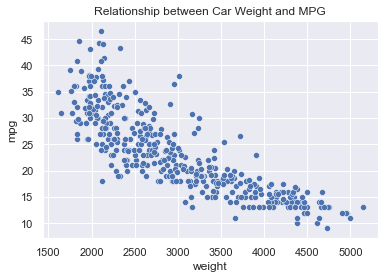

In [68]:
sns.scatterplot(x="weight", y='mpg', data=df_cars)
plt.title('Relationship between Car Weight and MPG')
plt.show()

The relationship between weight and mpg in this dataset is negative, nonlinear, and moderately strong. There do not appear to be any obvious outliers.

Given that this is not a linear relationship, we can already see that one of our linear regression conditions is not going to hold. But, for now, let's fit a regression model predicting mpg with weight and check what other conditions might not be met.

### 10.1 Initial Model Fitting

In [69]:
car_result = smf.ols('mpg ~ weight', data=df_cars).fit()
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          2.97e-103
Time:                        11:05:18   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 10.2 Initial Model Condition Checking 

**<u>Condition 1</u>: Linearity Condition**

The distribution of points in the plot below are NOT roughly evenly distributed above and below the line as we move from left to right, therefore we can NOT say the linearity condition is met.

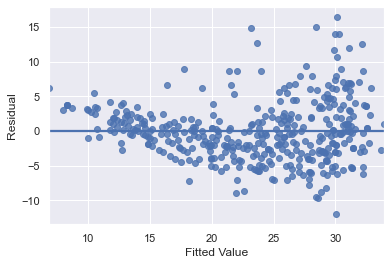

In [70]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below CHANGES as we move from left to right, thus we can NOT say that this condition is met.

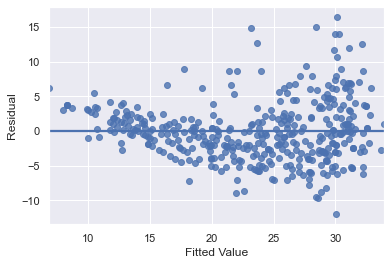

In [71]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

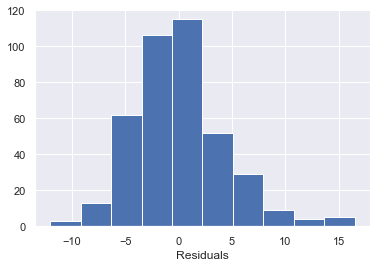

In [72]:
plt.hist(car_result.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=392<10% of all car models from the 70's and 80's

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

This is a simple linear regression model (which only has one explanatory variable), thus we do not need to check this condition.



### Thus, because not all of the model conditions are met:
* we cannot say that a linear model is a good fit for this data set,
* and inference we conduct on the population slopes/intercept of this model may be invalid.

**So what can we do?**


### 10.3. Try Transforming Some of the Variables to See if the Conditions are Met with That Variable Instead

Let's create a new variable in our df_cars dataframe that takes the natural log of each values in the response variable (mpg).

In [73]:
df_cars['log_mpg']=np.log(df_cars['mpg'])

df_cars.head()

,mpg,num_cylinders,displacement,horsepower,weight,acceleration,year,log_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,2.890372
1,15.0,8,350.0,165.0,3693,11.5,70,2.708050
2,18.0,8,318.0,150.0,3436,11.0,70,2.890372
3,16.0,8,304.0,150.0,3433,12.0,70,2.772589
4,17.0,8,302.0,140.0,3449,10.5,70,2.833213


### 10.4 Now, let try setting up our model again with log_mpg as our response variable instead.

In [74]:
car_result = smf.ols('log_mpg ~ weight', data=df_cars).fit()
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1301.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          3.45e-127
Time:                        11:05:19   Log-Likelihood:                 155.09
No. Observations:                 398   AIC:                            -306.2
Df Residuals:                     396   BIC:                            -298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1445      0.030    137.818      0.000       4.085       4.204
weight        -0.0004   9.74e-06    -36.066      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        5.176   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.678
Skew:                           0.163   Prob(JB):                       0.0585
Kurtosis:                       3.485   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 10.5 Let's check the conditions for our new model (with log_mpg response variable).

**<u>Condition 1</u>: Linearity Condition**

The distribution of points in the plot below are now roughly evenly distributed above and below the line as we move from left to right, therefore we can say the linearity condition is met.

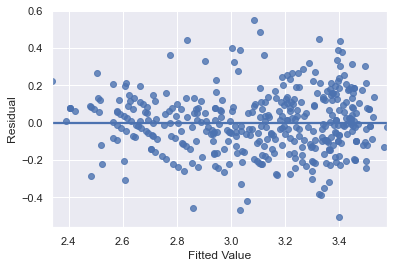

In [75]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

The y-axis spread of points in the plot below as we move from left to right now changes very little, thus we can now say that this condition is met.

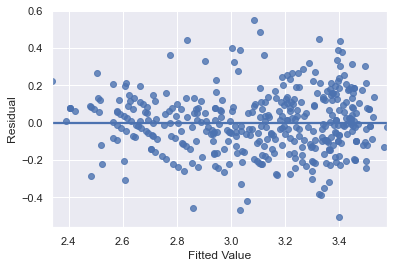

In [76]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is symmeric and unimodal and centered at 0, we can assume that the distribution of the residuals is normal with a mean of 0.

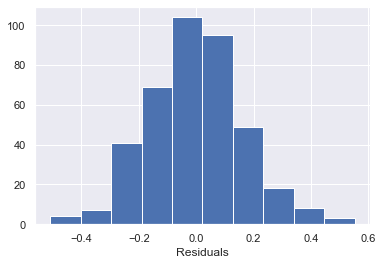

In [77]:
plt.hist(car_result.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=392<10% of all car models from the 70's and 80's

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

This is a simple linear regression model (which only has one explanatory variable), thus we do not need to check this condition.

So, we can now say that the conditions are met when predicting log_mpg with a weight in a simple linear regression model.

### 10.6 Predictions, Inference, and Interpretations Change when You Transform the Model

Be careful to remember that you transformed variables when being asked to do thing with your transformed model.

#### 10.6.1 Set up your new linear regression equation.

In [78]:
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1301.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          3.45e-127
Time:                        11:05:19   Log-Likelihood:                 155.09
No. Observations:                 398   AIC:                            -306.2
Df Residuals:                     396   BIC:                            -298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1445      0.030    137.818      0.000       4.085       4.204
weight        -0.0004   9.74e-06    -36.066      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        5.176   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.678
Skew:                           0.163   Prob(JB):                       0.0585
Kurtosis:                       3.485   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks like the slope is very small. To minimize rounding issues, let's extract the slope and intercept to get a more accurate (less rounded) estimate for the intercept and slope.

In [79]:
car_result.params

Intercept    4.144531
weight      -0.000351
dtype: float64

$\hat{ln(mpg)}=4.1445-0.0004(weight)$

#### 10.6.2 Predict the <u>mpg</u> of a 3500 lb car.



$\hat{ln(mpg)}=4.144531-0.000351(3500) = 2.92$

<br/>
<br/>
<br/>



In [80]:
car_result.predict(exog=dict(weight=3500))

0    2.915409
dtype: float64

Don't forget to exponentiate both sides of this equation to get the <u>predicted mpg</u> not the <u>predicted ln(mpg)</u>.

$e^{\hat{ln(mpg)}} = e^{2.92}$



In [81]:
np.exp(2.92)

18.54128745974687

$\hat{mpg} = 18.54$

#### 10.6.3 Interpret your intercept and slope of your model in words.

* <u>Intercept</u>: We would expect a car that is 0 lbs, on average, to have a ln(mpg) of 4.1445. (This is a nonsensical answer, as a car cannot be 0 lbs).

* <u>Slope</u>: If we were to increase the weight of a car by 1 lb, we would expect the ln(mpg) of the car to decrease, on average, by 0.000351.

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign